# Low b low l low velocity

In [3]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams.update({'font.size': 12})

In [5]:
data_file_path = '../../data_out/fourth_batch_all_prop.txt'

In [6]:
data = np.loadtxt(data_file_path, delimiter=',')

In [7]:
data.shape # 533 trees (excluding edge cases and ones that are too long in velocity), 22 fields outlined in keys

(1073, 33)

In [8]:
key_nums = data[:, 0]
ras = data[:, 1]
decs = data[:, 2]
ls = data[:, 3]
bs = data[:, 4]
sizes = data[:, 5]
roundnesses = data[:, 6]
starting_velocities = data[:, 7]
velocity_spans = data[:, 8]
average_velocities = data[:, 9]
moment_0_means = data[:, 10]
moment_0_medians = data[:, 11]
moment_0_peaks = data[:, 12]
moment_0_means_raw = data[:, 13]
moment_0_medians_raw = data[:, 14]
moment_0_peaks_raw = data[:, 15]
moment_1_means = data[:, 16]
moment_1_medians = data[:, 17]
moment_2_means = data[:, 18]
moment_2_medians = data[:, 19]
moment_2_peaks = data[:, 20]
column_density_means = data[:, 21]
column_density_medians = data[:, 22]
column_density_peaks = data[:, 23]
column_density_means_raw = data[:, 24]
column_density_medians_raw = data[:, 25]
column_density_peaks_raw = data[:, 26]
width_fits = data[:, 27]
width_errs = data[:, 28]
width_chisq = data[:, 29]
width_fits_raw = data[:, 30]
width_errs_raw = data[:, 31]
width_chisq_raw = data[:, 32]

In [9]:
v_cut = 10
b_cut = 30

In [10]:
idx = (np.abs(moment_1_means) < v_cut) & ((np.abs(bs) > b_cut) | (np.abs(bs) < b_cut) & ((ls < 90) | (ls > 270)))
# (v < 10) AND (b > 30 OR (b < 30 AND not galactic 180))

In [11]:
idx_n = -1 * idx

/Users/larryli/anaconda/envs/py27research/lib/python2.7/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


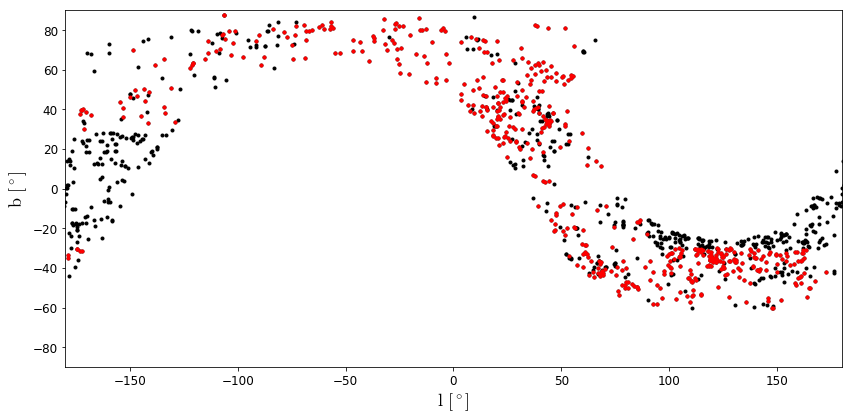

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
ax.scatter(ls, bs, marker='.', color='black')
ax.scatter(ls-360, bs, marker='.', color='black')

ax.scatter(ls[idx], bs[idx], marker='.', color='red')
ax.scatter(ls[idx]-360, bs[idx], marker='.', color='red')

ax.set_ylim(-90, 90)
ax.set_xlim(-180, 180)
ax.set_xlabel(r'$\mathrm{l}\ [^\circ]$', fontsize=18)
ax.set_ylabel(r'$\mathrm{b}\ [^\circ]$', fontsize=18)
fig.tight_layout()
fig.show()

In [13]:
print(np.nanmean(width_fits_raw), np.nanmedian(width_fits_raw), np.nanstd(width_fits_raw))

(0.19579672005006082, 0.19226457765215477, 0.040106175819635492)


In [14]:
print(np.nanmean(width_fits_raw[idx]), np.nanmedian(width_fits_raw[idx]), np.nanstd(width_fits_raw[idx]))

(0.19720879278243317, 0.19448312691188871, 0.040774529737858965)


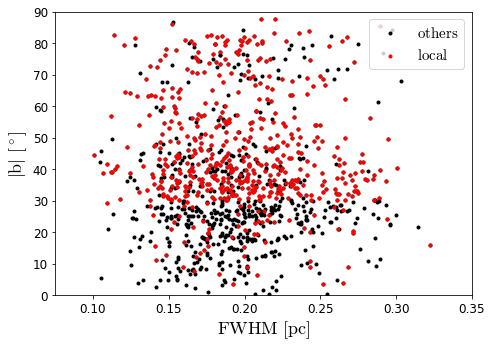

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,5))
ax.scatter(width_fits_raw, np.abs(bs), marker='.', color='black', label=r'$\mathrm{others}$')
ax.scatter(width_fits_raw[idx], np.abs(bs[idx]), marker='.', color='red', label=r'$\mathrm{local}$')
ax.legend(fontsize=15)
ax.set_xlabel(r'$\mathrm{FWHM}\ [\mathrm{pc}]$', fontsize=18)
ax.set_ylabel(r'$\mathrm{|b|}\ [^\circ]$', fontsize=18)
ax.set_xlim(.075, .35)
ax.set_ylim(0, 90)
fig.tight_layout()
fig.show()

In [16]:
fig.savefig('../../vis/all_sky_maps_fourth_batch/FWHM_vs_abs_b_color_by_local.pdf')

In [17]:
dist_data = np.loadtxt('../../dist_data/fourth_batch_all_prop_corr_lbdistances.txt', delimiter=' ')
dist = dist_data[:,2]
dist_err = dist_data[:,4]
lower_lim_flag = dist_data[:,6]

### distances

<Container object of 3 artists>

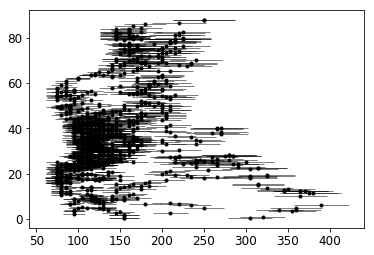

In [18]:
plt.errorbar(dist,  np.abs(bs), xerr=dist_err, fmt='.', color='black', linewidth=.5)

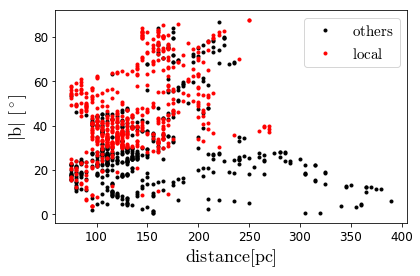

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(dist[~idx], np.abs(bs[~idx]), '.', color='black', label=r'$\mathrm{others}$')
ax.plot(dist[idx], np.abs(bs[idx]), '.', color='red', label=r'$\mathrm{local}$')
ax.legend(fontsize=15)
ax.set_xlabel(r'$\mathrm{distance [pc]}$', fontsize=18)
ax.set_ylabel(r'$|\mathrm{b}|\ [^\circ]$', fontsize=18)
fig.tight_layout()
fig.show()

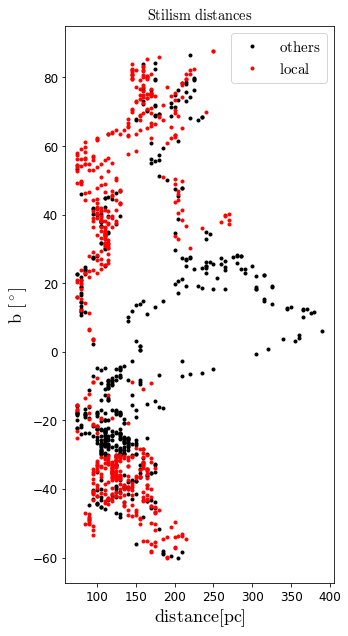

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,9))
ax.plot(dist[~idx], bs[~idx], '.', color='black', label=r'$\mathrm{others}$')
ax.plot(dist[idx], bs[idx], '.', color='red', label=r'$\mathrm{local}$')
ax.legend(fontsize=15)
ax.set_xlabel(r'$\mathrm{distance [pc]}$', fontsize=18)
ax.set_ylabel(r'$\mathrm{b}\ [^\circ]$', fontsize=18)
ax.set_title(r'$\mathrm{Stilism\ distances}$')
fig.tight_layout()
fig.show()

In [21]:
fig.savefig('../../vis/all_sky_maps_fourth_batch/stilism_distance_vs_b.pdf')

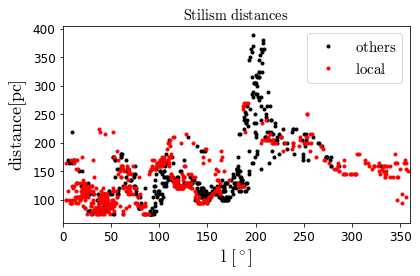

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(ls[~idx], dist[~idx], '.', color='black', label=r'$\mathrm{others}$')
ax.plot(ls[idx], dist[idx], '.', color='red', label=r'$\mathrm{local}$')
ax.set_xlim(0, 360)
ax.legend(fontsize=15)
ax.set_ylabel(r'$\mathrm{distance [pc]}$', fontsize=18)
ax.set_xlabel(r'$\mathrm{l}\ [^\circ]$', fontsize=18)
ax.set_title(r'$\mathrm{Stilism\ distances}$')
fig.tight_layout()
fig.show()

In [23]:
fig.savefig('../../vis/all_sky_maps_fourth_batch/stilism_distance_vs_l.pdf')

### flatcurve distance from Josh

In [24]:
from cube_fil_finder.util import distance

In [26]:
flatcurve_distance = [distance.nearside_flatcurve_distance(ls[i],
                                                           bs[i],
                                                           moment_1_means[i]) for i in range(data.shape[0])]

In [28]:
flatcurve_distance = np.asarray(flatcurve_distance)

In [24]:
flatcurve_distance = np.loadtxt('../../dist_data/fourth_batch_flatcurve_dist.txt', delimiter=',')

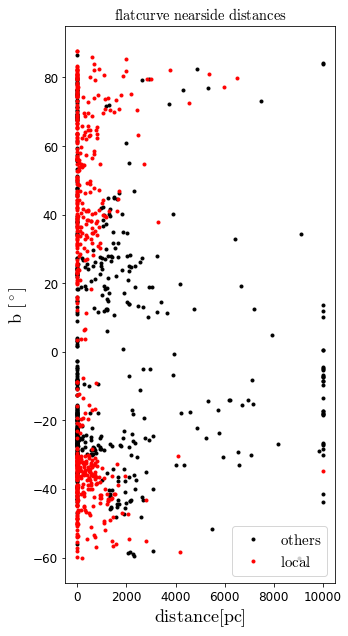

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,9))
ax.plot(flatcurve_distance[~idx], bs[~idx], '.', color='black', label=r'$\mathrm{others}$')
ax.plot(flatcurve_distance[idx], bs[idx], '.', color='red', label=r'$\mathrm{local}$')
ax.legend(fontsize=15)
ax.set_xlabel(r'$\mathrm{distance [pc]}$', fontsize=18)
ax.set_ylabel(r'$\mathrm{b}\ [^\circ]$', fontsize=18)
ax.set_title(r'$\mathrm{flatcurve\ nearside \ distances}$')
fig.tight_layout()
fig.show()

In [26]:
fig.savefig('../../vis/all_sky_maps_fourth_batch/flatcurve_distance_vs_b.pdf')

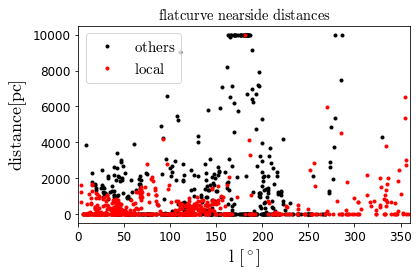

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(ls[~idx], flatcurve_distance[~idx], '.', color='black', label=r'$\mathrm{others}$')
ax.plot(ls[idx], flatcurve_distance[idx], '.', color='red', label=r'$\mathrm{local}$')
ax.set_xlim(0, 360)
ax.legend(fontsize=15)
ax.set_ylabel(r'$\mathrm{distance [pc]}$', fontsize=18)
ax.set_xlabel(r'$\mathrm{l}\ [^\circ]$', fontsize=18)
ax.set_title(r'$\mathrm{flatcurve\ nearside \ distances}$')
fig.tight_layout()
fig.show()

In [28]:
fig.savefig('../../vis/all_sky_maps_fourth_batch/flatcurve_distance_vs_l.pdf')

In [51]:
np.savetxt('../../dist_data/fourth_batch_flatcurve_dist.txt', flatcurve_distance, delimiter=',')